## Task 1: Implement a gradient boosting machine (GBM) using XGBoost. Tune the hyperparameters for optimal performanc

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Collecting xgboost
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 1.3 MB/s eta 0:01:38
   ---------------------------------------- 0.0/124.9 MB 1.3 MB/s eta 0:01:38
   ---------------------------------------- 0.1/124.9 MB 544.7 kB/s eta 0:03:50
   ---------------------------------------- 0.1/124.9 MB 819.2 kB/s eta 0:02:33
   ---------------------------------------- 0.1/124.9 MB 711.9 kB/s eta 0:02:56
   ---------------------------------------- 0.2/124.9 MB 962.7 kB/s eta 0:02:10
   ---------------------------------------- 0.2/124.9 MB 962.7 kB/s eta 0:02:10
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:59
   ---------------------------------------- 0.4/124.9 MB 1.1 MB/s eta 0:01:54
   ---------------------------------------- 0.4/124.9 MB 1.0 MB/s eta 0:01:59
   ---------------------------------------- 0.6/124.9 M


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ----- --------------------------------- 16.9/124.9 MB 498.6 kB/s eta 0:03:37
   ----- --------------------------------- 16.9/124.9 MB 498.6 kB/s eta 0:03:37
   ----- --------------------------------- 16.9/124.9 MB 497.5 kB/s eta 0:03:38
   ----- --------------------------------- 16.9/124.9 MB 497.5 kB/s eta 0:03:38
   ----- --------------------------------- 16.9/124.9 MB 497.5 kB/s eta 0:03:38
   ----- --------------------------------- 16.9/124.9 MB 494.5 kB/s eta 0:03:39
   ----- --------------------------------- 16.9/124.9 MB 494.5 kB/s eta 0:03:39
   ----- --------------------------------- 16.9/124.9 MB 494.5 kB/s eta 0:03:39
   ----- --------------------------------- 16.9/124.9 MB 491.2 kB/s eta 0:03:40
   ----- --------------------------------- 16.9/124.9 MB 491.2 kB/s eta 0:03:40
   ----- --------------------------------- 16.9/124.9 MB 491.2 kB/s eta 0:03:40
   ----- --------------------------------- 17.0/124.9 MB 488.6 kB/s eta 0:03:41
   ----- -------------------------------

In [4]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Best parameters and accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Test the model with test data
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:46:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}
Best Accuracy: 0.975775531544092
Test Accuracy: 0.9649122807017544


## Task 2: Train a recurrent neural network (RNN) for time series forecasting. Use LSTM/GRU units for better performance.

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate dummy time series data
data = np.sin(np.arange(0, 100, 0.1))  # Sine wave data
data = data.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Prepare the dataset
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(data_scaled, time_steps)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))  # Output layer for forecasting

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform to get back to original scale
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test)

# Print predictions and true values for comparison
print("Predicted:", y_pred_inverse[:5].flatten())
print("True Values:", y_test_inverse[:5].flatten())


C:\Users\Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.3052 - val_loss: 0.0465
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0400 - val_loss: 0.0292
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0270 - val_loss: 0.0218
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0208 - val_loss: 0.0176
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0167 - val_loss: 0.0114
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0096 - val_loss: 0.0045
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012 - val_loss: 9.8889e-04
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.5107e-04 - val_loss: 7.9919e-04
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

## Task 3: Build a natural language processing (NLP) pipeline using word embeddings (Word2Vec, GloVe) and recurrent neural networks. Train the model on a sentiment analysis task.


In [5]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.datasets import imdb
from tensorflow.keras.initializers import Constant

# Load the IMDb dataset
max_words = 10000  # Maximum number of words to keep, based on word frequency
max_len = 100  # Maximum length of a sentence (padded if shorter)

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

# Pad sequences to ensure consistent input size
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Load GloVe embeddings
embedding_dim = 100
embedding_index = {}
with open(r'C:\Users\Student\Desktop\python jupyter\glove.6B.100d.txt', encoding='unicode_escape') as f:
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')  # Try to convert to float
            embedding_index[word] = coefs
        except ValueError:
            print(f"Skipping line due to ValueError: {line}")

# Create an embedding matrix for the words in the IMDb dataset
tokenizer = Tokenizer(num_words=max_words)
word_index = tokenizer.word_index

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Build the LSTM model
model = Sequential()

# Embedding layer with pre-trained GloVe weights
model.add(Embedding(input_dim=max_words, 
                    output_dim=embedding_dim, 
                    embeddings_initializer=Constant(embedding_matrix), 
                    input_length=max_len, 
                    trainable=False))  # Set to False to keep GloVe weights frozen

# Add LSTM layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Output layer for binary classification (sentiment: positive/negative)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
score, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)


Skipping line due to ValueError: nguyá»n -0.24928 -0.48798 -0.38414 0.040918 -0.10727 -0.19146 -0.76531 -0.56747 0.34444 -0.93075 0.40587 0.45185 -0.48133 0.15053 0.018249 0.09547 0.77353 -1.512 -0.4003 -0.18276 -0.029931 -0.9112 0.5138 -0.48681 -0.25193 0.91517 0.27574 -0.0049762 0.4576 -0.41203 0.64301 -0.06193 0.64871 -1.0907 0.29427 1.0565 0.45244 -0.45153 -0.17159 0.44066 0.41998 0.25365 -0.41138 -0.40393 1.0576 -0.51833 0.37345 -0.22924 0.8332 0.58848 -0.74264 0.20754 0.045234 -0.57158 -0.05943 0.86561 -0.89409 -0.77124 -0.40132 -0.27432 0.22603 -0.069566 0.18677 0.48316 -0.2751 0.063893 0.12957 0.069689 -0.40573 1.1282 0.92122 0.0083348 0.088755 -0.65308 -1.0026 0.96718 -1.6559 0.33907 -0.15776 -0.16186 -0.17152 -0.095014 -0.42644 -0.37355 0.013398 1.0664 -1.0206 -0.35531 -0.17938 -0.38907 0.11086 -0.098646 -0.011442 1.0782 0.19574 -0.61643 0.084102 -1.1294 -0.652 -0.87127

Skipping line due to ValueError: dÄbrowa -0.6339 -1.4172 0.26389 0.51266 0.76551 1.1024 -0.3032 0.077167

C:\Users\Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 117s 274ms/step - accuracy: 0.5008 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 106s 272ms/step - accuracy: 0.5065 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 107s 273ms/step - accuracy: 0.5070 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 106s 272ms/step - accuracy: 0.4973 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 106s 272ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.4927 - loss: 0.6933
Test Accuracy: 0.5


## Task 4: Implement a GAN (Generative Adversarial Network) to generate synthetic images. Train the GAN on a dataset of your choice.


C:\Users\Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 


C:\Users\Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.7251032590866089, acc: 0.3671875] [G loss: [array(0.73586875, dtype=float32), array(0.73586875, dtype=float32), array(0.3125, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


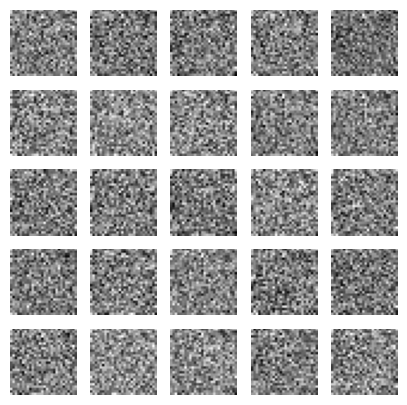

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 127.5 - 1.0  # Normalize images to [-1, 1]
x_train = np.expand_dims(x_train, axis=-1)  # Reshape (28, 28) -> (28, 28, 1)

# Define the Generator
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(128, activation="relu", input_shape=(100,)),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(28 * 28 * 1, activation="tanh"),
        layers.Reshape((28, 28, 1))
    ])
    return model

# Define the Discriminator
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

# Compile the GAN
def compile_gan(generator, discriminator):
    discriminator.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    discriminator.trainable = False

    gan_input = layers.Input(shape=(100,))
    generated_image = generator(gan_input)
    gan_output = discriminator(generated_image)

    gan = tf.keras.Model(gan_input, gan_output)
    gan.compile(loss="binary_crossentropy", optimizer="adam")
    
    return gan

# Training the GAN
def train_gan(generator, discriminator, gan, epochs=10000, batch_size=64):
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_images = x_train[idx]

        noise = np.random.normal(0, 1, (batch_size, 100))
        fake_images = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, real_labels)

        # Print progress
        if epoch % 1000 == 0:
            print(f"{epoch} [D loss: {d_loss[0]}, acc: {d_loss[1]}] [G loss: {g_loss}]")
            save_images(generator)

# Function to save generated images
def save_images(generator, examples=25, dim=(5, 5), figsize=(5, 5)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)

    generated_images = 0.5 * generated_images + 0.5  # Rescale images [0, 1]

    fig, axs = plt.subplots(dim[0], dim[1], figsize=figsize)
    count = 0
    for i in range(dim[0]):
        for j in range(dim[1]):
            axs[i, j].imshow(generated_images[count, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            count += 1
    plt.show()

# Build and compile the GAN
generator = build_generator()
discriminator = build_discriminator()
gan = compile_gan(generator, discriminator)

# Train the GAN
train_gan(generator, discriminator, gan, epochs=10000, batch_size=64)


## Task 5: Develop a recommendation system using collaborative filtering and matrix factorization techniques.


In [ ]:
pip install scikit-surprise


In [ ]:
# Import necessary libraries
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy

# Load the MovieLens dataset (a built-in dataset in Surprise)
data = Dataset.load_builtin('ml-100k')

# Train-test split
trainset, testset = train_test_split(data, test_size=0.25)

# Use SVD (matrix factorization) to build the recommendation system
algo = SVD()

# Train the algorithm on the training set
algo.fit(trainset)

# Make predictions on the test set
predictions = algo.test(testset)

# Calculate accuracy
accuracy.rmse(predictions)

# Make a prediction for a specific user and item
user_id = str(196)  # MovieLens user IDs are strings
item_id = str(302)  # MovieLens item IDs are strings

# Predict the rating
pred = algo.predict(user_id, item_id)
print(f"Predicted rating for user {user_id} and item {item_id}: {pred.est}")
